In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [22]:
from pathlib import Path

# Configurable parts
SYMBOL = "USDJPY"
SAMPLE_TYPE = "time"
MINUTES = 5

START_DATE = "20240101"
END_DATE = "20241231"

# Build base name
RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"
EVENTS_DIR = BASE_DIR / "events"

# Final paths
RESAMPLED_FILE_PATH = RESAMPLED_DIR / f"{RESAMPLED_NAME}.pkl"
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}_processed.pkl"

In [23]:
%%time
df = pd.read_pickle(PROCESSED_FILE_PATH)

CPU times: user 1.64 ms, sys: 13.9 ms, total: 15.5 ms
Wall time: 52.1 ms


In [24]:
df.shape

(72013, 10)

In [25]:
df.head()

,open,high,low,close,volume,spread,return,log_return,fd_return,log_fd_return
timestamp,,,,,,,,,,
2024-01-15 06:35:00,1.096440,1.096615,1.096425,1.096595,9.697500e+11,0.000027,0.000160,0.000146,0.113814,0.009814
2024-01-15 06:40:00,1.096600,1.096620,1.096510,1.096595,5.448600e+11,0.000025,0.000000,0.000000,0.113773,0.009777
2024-01-15 06:45:00,1.096600,1.096605,1.096445,1.096525,7.287000e+11,0.000025,-0.000070,-0.000064,0.113687,0.009698
2024-01-15 06:50:00,1.096530,1.096625,1.096485,1.096545,8.230700e+11,0.000027,0.000020,0.000018,0.113715,0.009724
2024-01-15 06:55:00,1.096535,1.096545,1.096340,1.096400,9.327600e+11,0.000026,-0.000145,-0.000132,0.113565,0.009587


In [26]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'return',
       'log_return', 'fd_return', 'log_fd_return'],
      dtype='object')

In [27]:
FAST = 9
SLOW = 36
EVENT_PATH = EVENTS_DIR / f"{RESAMPLED_NAME}_EMA_CROSS_{FAST}_{SLOW}.pkl"

## Calculating EMA

In [28]:
import pandas_ta as ta

In [29]:
df.ta.ema(length=FAST, append=True)
df.ta.ema(length=SLOW, append=True)
df.dropna(inplace=True)
df.head()

,open,high,low,close,volume,spread,return,log_return,fd_return,log_fd_return,EMA_9,EMA_36
timestamp,,,,,,,,,,,,
2024-01-15 09:30:00,1.095370,1.095590,1.095195,1.095210,1.593140e+12,0.000026,-0.000170,-0.000155,0.112994,0.009066,1.095487,1.095942
2024-01-15 09:35:00,1.095205,1.095260,1.094505,1.094720,2.303230e+12,0.000025,-0.000490,-0.000448,0.112562,0.008671,1.095333,1.095876
2024-01-15 09:40:00,1.094715,1.094765,1.094535,1.094555,2.130620e+12,0.000024,-0.000165,-0.000151,0.112551,0.008661,1.095178,1.095805
2024-01-15 09:45:00,1.094550,1.094710,1.094305,1.094695,1.957260e+12,0.000019,0.000140,0.000128,0.112800,0.008889,1.095081,1.095745
2024-01-15 09:50:00,1.094680,1.094720,1.094420,1.094600,2.538950e+12,0.000024,-0.000095,-0.000087,0.112726,0.008821,1.094985,1.095683


## Finding Cross Points

In [10]:
df['ema_cross_flag'] = df[f'EMA_{FAST}'] > df[f'EMA_{SLOW}']
df.head()

,open,high,low,close,volume,spread,return,log_return,fd_return,log_fd_return,EMA_8,EMA_34,ema_cross_flag
timestamp,,,,,,,,,,,,,
2024-02-19 07:15:00,1.078825,1.078950,1.078660,1.078685,2.587290e+12,0.000025,-0.000145,-0.000134,0.168021,0.012044,1.078452,1.078193,True
2024-02-19 07:30:00,1.078695,1.078880,1.078605,1.078615,3.026060e+12,0.000023,-0.000070,-0.000065,0.167940,0.011969,1.078488,1.078217,True
2024-02-19 07:45:00,1.078580,1.078660,1.078140,1.078270,3.979570e+12,0.000022,-0.000345,-0.000320,0.167593,0.011647,1.078440,1.078220,True
2024-02-19 08:00:00,1.078305,1.078640,1.078240,1.078590,5.892830e+12,0.000024,0.000320,0.000297,0.167977,0.012002,1.078473,1.078241,True
2024-02-19 08:15:00,1.078615,1.078745,1.078270,1.078675,5.110300e+12,0.000025,0.000085,0.000079,0.168014,0.012037,1.078518,1.078266,True


In [11]:
t_events = df.index[df['ema_cross_flag'] != df['ema_cross_flag'].shift(1)]
t_events

DatetimeIndex(['2024-02-19 07:15:00', '2024-02-19 09:00:00',
               '2024-02-19 18:00:00', '2024-02-20 00:00:00',
               '2024-02-20 07:00:00', '2024-02-20 07:45:00',
               '2024-02-20 08:00:00', '2024-02-20 22:00:00',
               '2024-02-20 22:45:00', '2024-02-21 01:15:00',
               ...
               '2024-12-27 17:00:00', '2024-12-27 18:30:00',
               '2024-12-27 21:30:00', '2024-12-27 21:45:00',
               '2024-12-30 02:15:00', '2024-12-30 06:15:00',
               '2024-12-30 08:00:00', '2024-12-30 10:00:00',
               '2024-12-30 13:45:00', '2024-12-30 23:45:00'],
              dtype='datetime64[ns]', name='timestamp', length=813, freq=None)

### Plotting Results

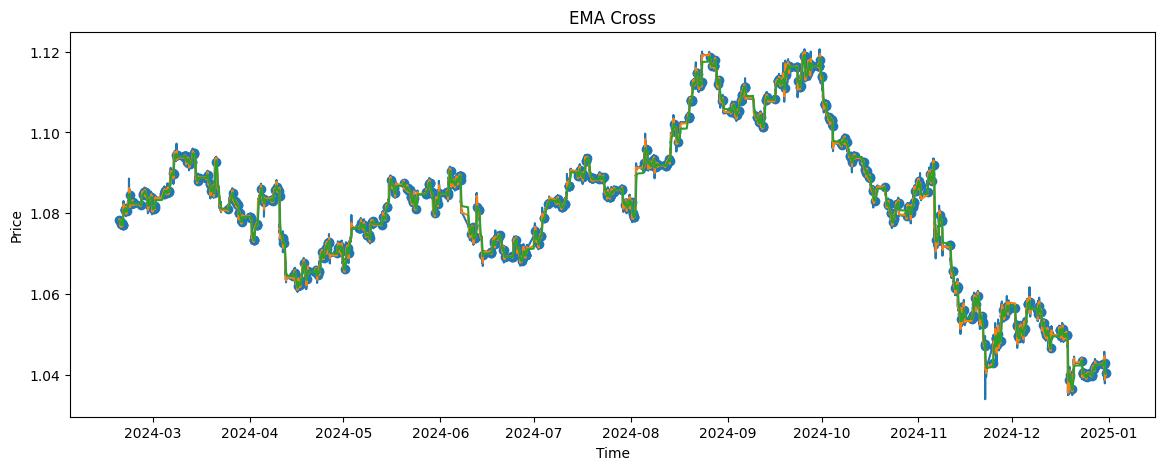

In [12]:
# Using the outputs from (2)
plt.figure(figsize=(14,5))
plt.plot(df.index, df['close'])
plt.plot(df.index, df[f'EMA_{FAST}'])
plt.plot(df.index, df[f'EMA_{SLOW}'])
plt.scatter(t_events, df[f'EMA_{FAST}'].loc[t_events])

plt.title('EMA Cross')
plt.xlabel('Time'); plt.ylabel('Price')
plt.show()

### Saving File

In [13]:
EVENT_PATH

PosixPath('../data/events/USDJPY-15m-20240101-20241231_EMA_CROSS_8_34.pkl')

In [14]:
t_events.to_series().to_pickle(EVENT_PATH)